In [1]:
!pip3 install praw
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install pandas
!pip3 install nltk
!pip3 install gensim

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement 

In [4]:
import time
import praw
import pandas as pd
import json

reddit = praw.Reddit(
    client_id="Hz2zkQJCMOiFVifmyeGzrg",
    client_secret="2_ydmLRpoLBtuqOx_6WNoq1j59BZXw",
    user_agent="Emergency Management",
)



params = {'sort':'new', 'limit':None, 'time_filter':'year'}

columns = ['author', 'author_flair_text', 'clicked', 'comments', 'created_utc',
           'distinguished', 'edited', 'id', 'is_original_content', 'is_self',
           'link_flair_template_id', 'link_flair_text', 'locked', 'name',
           'num_comments', 'over_18', 'permalink', 'poll_data', 'saved', 'score',
           'selftext', 'spoiler', 'stickied', 'subreddit', 'title', 'upvote_ratio', 'url']

df = pd.DataFrame(columns=columns)
with open('./sub_keyword.json', 'r') as file:
    data = json.load(file)
iterations = data['iterations']

for iteration in iterations:
    for subreddit in iteration['subreddits']:
        for keyword in iteration['keywords']:
            for submission in reddit.subreddit(subreddit).search(keyword, **params):
                new_row = {
                    'author': submission.author.name,
                    'created_utc': int(submission.created_utc),
                    'id': submission.id,
                    'name': submission.name,
                    'num_comments': submission.num_comments,
                    'permalink': submission.permalink,
                    'selftext': submission.selftext,
                    'subreddit': submission.subreddit.display_name,
                    'title': submission.title,
                    'upvote_ratio': submission.upvote_ratio,
                    'url': submission.url
                }
                df.loc[len(df)] = new_row
            time.sleep(60)

df = df.drop_duplicates(subset='id', keep='first')

df.to_csv('./reddit.csv', index=False)
df.head()


,author,author_flair_text,clicked,comments,created_utc,distinguished,edited,id,is_original_content,is_self,...,poll_data,saved,score,selftext,spoiler,stickied,subreddit,title,upvote_ratio,url
0,PatchyTheP,NaN,NaN,NaN,1695664037,NaN,NaN,16rysy5,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,shittymobilegameads,Fawk,1.0,https://i.redd.it/5h6jzqxqvfqb1.png
1,loverzz22,NaN,NaN,NaN,1695663729,NaN,NaN,16ryocg,NaN,NaN,...,NaN,NaN,NaN,Anyone know if the 100% buy miles bonus is bac...,NaN,NaN,unitedairlines,Buy Miles Bonus?,1.0,https://www.reddit.com/r/unitedairlines/commen...
2,swervb,NaN,NaN,NaN,1695663680,NaN,NaN,16rynl0,NaN,NaN,...,NaN,NaN,NaN,So I before the last big update on the ER8411 ...,NaN,NaN,TPLink_Omada,ER8411... OpenVPN... after the most recent update,1.0,https://www.reddit.com/r/TPLink_Omada/comments...
3,professorbrainiac,NaN,NaN,NaN,1695663546,NaN,NaN,16rylhn,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,MapPorn,Kingdom of Cnut the Great (1014-1035),1.0,https://i.redd.it/3odcvntaufqb1.jpg
4,woooooopwooopwoooo,NaN,NaN,NaN,1695663481,NaN,NaN,16rykhw,NaN,NaN,...,NaN,NaN,NaN,So this is like. SO dumb but basically I went ...,NaN,NaN,Mononucleosis,Help lol,1.0,https://www.reddit.com/r/Mononucleosis/comment...


In [5]:
df

,author,author_flair_text,clicked,comments,created_utc,distinguished,edited,id,is_original_content,is_self,...,poll_data,saved,score,selftext,spoiler,stickied,subreddit,title,upvote_ratio,url
0,PatchyTheP,NaN,NaN,NaN,1695664037,NaN,NaN,16rysy5,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,shittymobilegameads,Fawk,1.00,https://i.redd.it/5h6jzqxqvfqb1.png
1,loverzz22,NaN,NaN,NaN,1695663729,NaN,NaN,16ryocg,NaN,NaN,...,NaN,NaN,NaN,Anyone know if the 100% buy miles bonus is bac...,NaN,NaN,unitedairlines,Buy Miles Bonus?,1.00,https://www.reddit.com/r/unitedairlines/commen...
2,swervb,NaN,NaN,NaN,1695663680,NaN,NaN,16rynl0,NaN,NaN,...,NaN,NaN,NaN,So I before the last big update on the ER8411 ...,NaN,NaN,TPLink_Omada,ER8411... OpenVPN... after the most recent update,1.00,https://www.reddit.com/r/TPLink_Omada/comments...
3,professorbrainiac,NaN,NaN,NaN,1695663546,NaN,NaN,16rylhn,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,MapPorn,Kingdom of Cnut the Great (1014-1035),1.00,https://i.redd.it/3odcvntaufqb1.jpg
4,woooooopwooopwoooo,NaN,NaN,NaN,1695663481,NaN,NaN,16rykhw,NaN,NaN,...,NaN,NaN,NaN,So this is like. SO dumb but basically I went ...,NaN,NaN,Mononucleosis,Help lol,1.00,https://www.reddit.com/r/Mononucleosis/comment...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18673,RKODDP,NaN,NaN,NaN,1693707193,NaN,NaN,168kt27,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,ymirxhistoria,Ymir x Historia,1.00,https://www.reddit.com/gallery/168kt27
18674,Majorshigo,NaN,NaN,NaN,1693699978,NaN,NaN,168ibm0,NaN,NaN,...,NaN,NaN,NaN,My insta: Majorshigo \nPhoto Credit: @ulevifilm,NaN,NaN,attackontitan,My Ymir Fritz Cosplay!,0.97,https://i.redd.it/jq1u9urknxlb1.jpg
18675,BlackSheepWI,NaN,NaN,NaN,1693692419,NaN,NaN,168fcxq,NaN,NaN,...,NaN,NaN,NaN,I know I'm asking for too much when it's alrea...,NaN,NaN,titanfolk,How do non-Eldians even exist?,1.00,https://www.reddit.com/r/titanfolk/comments/16...
18676,KenMei-SLG,NaN,NaN,NaN,1693670128,NaN,NaN,16861lf,NaN,NaN,...,NaN,NaN,NaN,,NaN,NaN,FireEmblemHeroes,"Little FEH sketches of Ymir, Fallen Ike & Brid...",0.97,https://www.reddit.com/gallery/16861lf


In [6]:


df['created_utc_clean'] = df['created_utc'].apply(lambda x: time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(x)))
df['created_utc_clean'].head()

0    2023-09-25 11:47:17
1    2023-09-25 11:42:09
2    2023-09-25 11:41:20
3    2023-09-25 11:39:06
4    2023-09-25 11:38:01
Name: created_utc_clean, dtype: object

In [7]:
df['created_utc_clean'].tail()

18673    2023-09-02 20:13:13
18674    2023-09-02 18:12:58
18675    2023-09-02 16:06:59
18676    2023-09-02 09:55:28
18677    2023-09-02 02:58:47
Name: created_utc_clean, dtype: object

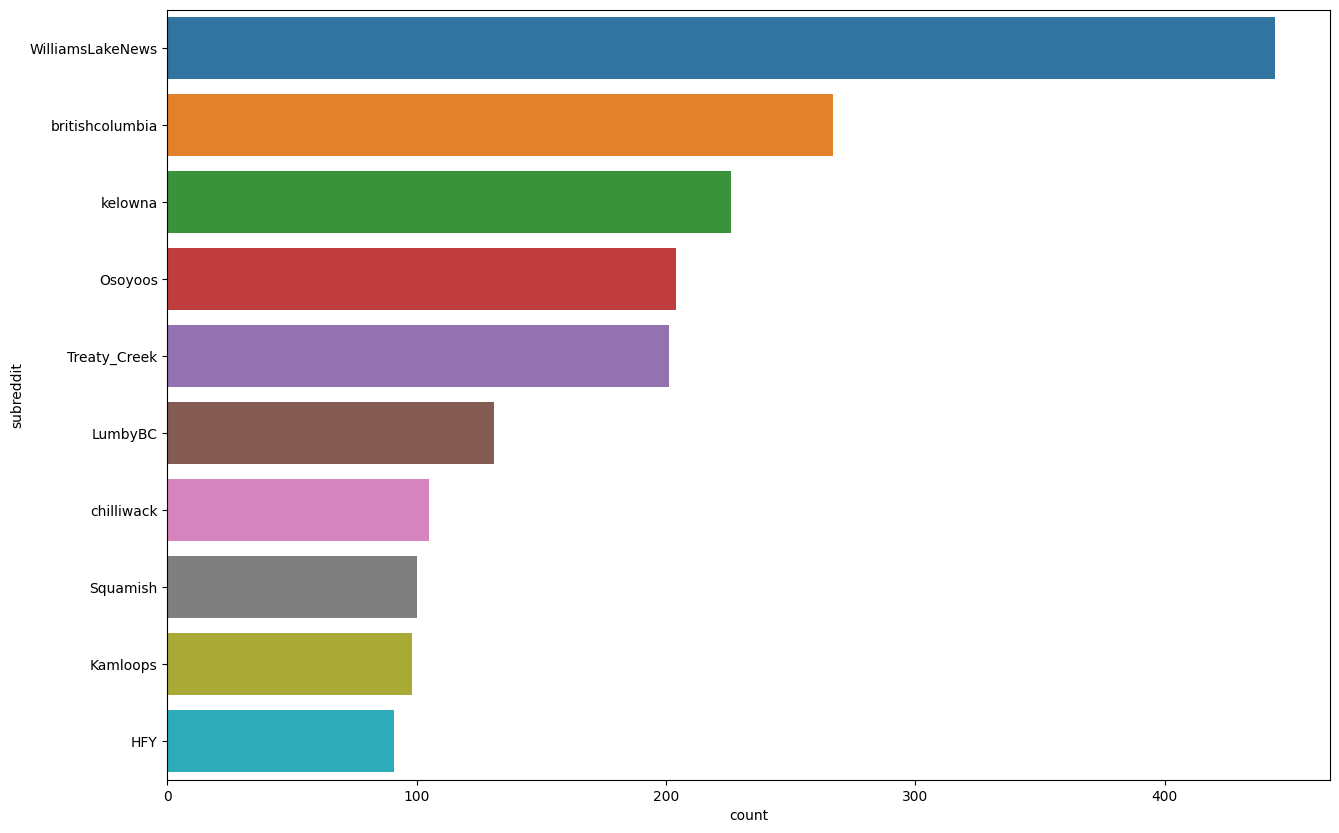

In [8]:
# create a fig with most frequent subreddits
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(y="subreddit", data=df, order=df['subreddit'].value_counts().iloc[:10].index, ax=ax)
plt.show()

In [9]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/alireza/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/alireza/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/alireza/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/alireza/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/alireza/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |     /home/alireza/nltk_data...
[nltk_data]    | Downloadi

True

/usr/lib/python3/dist-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


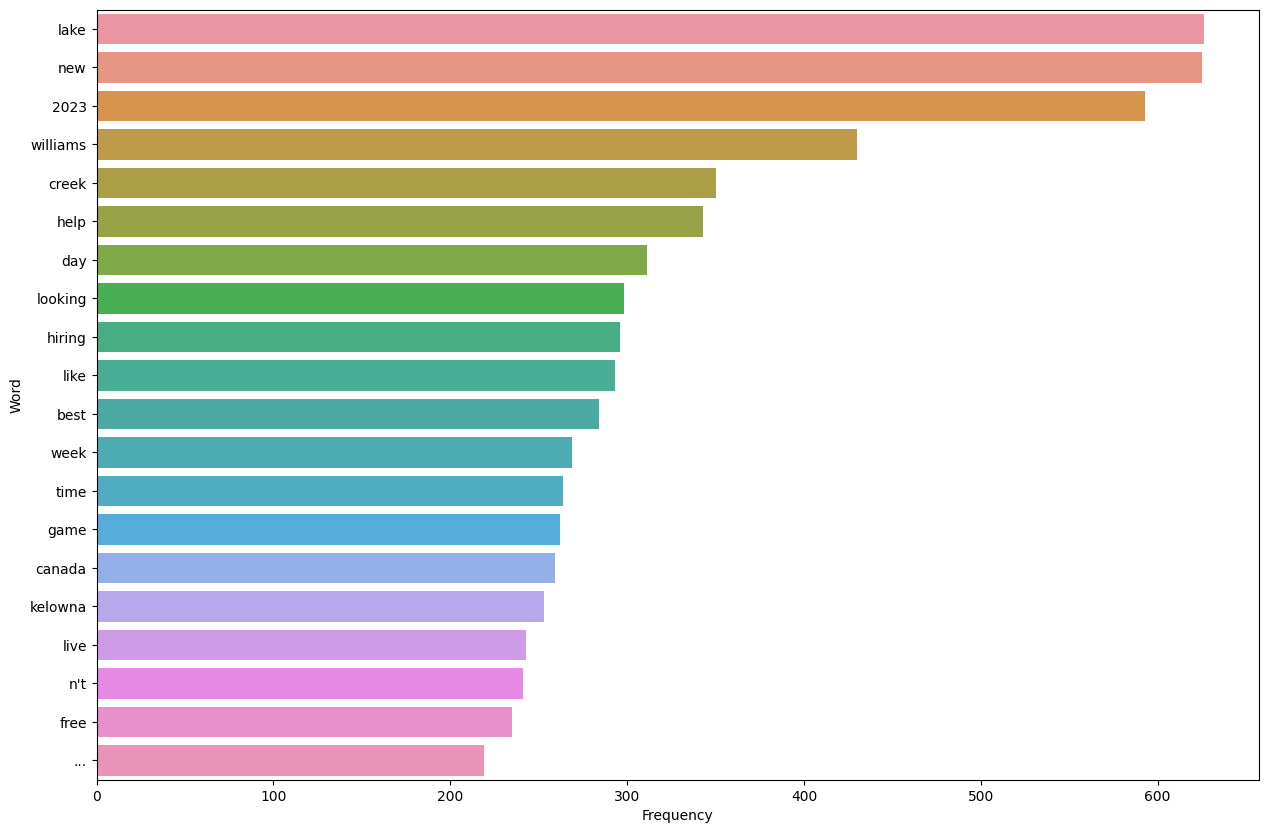

In [10]:
# create a fig with most keywords in titles
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from collections import Counter
from gensim.parsing.preprocessing import STOPWORDS


fig, ax = plt.subplots(figsize=(15, 10))
all_titles = ' '.join(df['title'].tolist())
all_titles = all_titles.lower()
words = word_tokenize(all_titles)
word_counts = Counter(words)
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)
word_counts_df = word_counts_df[word_counts_df['Word'].str.len() > 2]
word_counts_df = word_counts_df[~word_counts_df['Word'].isin(STOPWORDS)]

sns.barplot(x="Frequency", y="Word", data=word_counts_df.iloc[:20], ax=ax)
plt.show()

0    2023-09-25
1    2023-09-25
2    2023-09-25
3    2023-09-25
4    2023-09-25
Name: created_utc, dtype: object
created_utc
2023-09-25    4298
2023-09-24    1234
2023-09-23     930
2023-09-22     567
2023-09-21     371
              ... 
2023-02-05       2
2023-02-09       2
2023-02-22       2
2022-10-19       2
2023-01-02       2
Name: count, Length: 348, dtype: int64


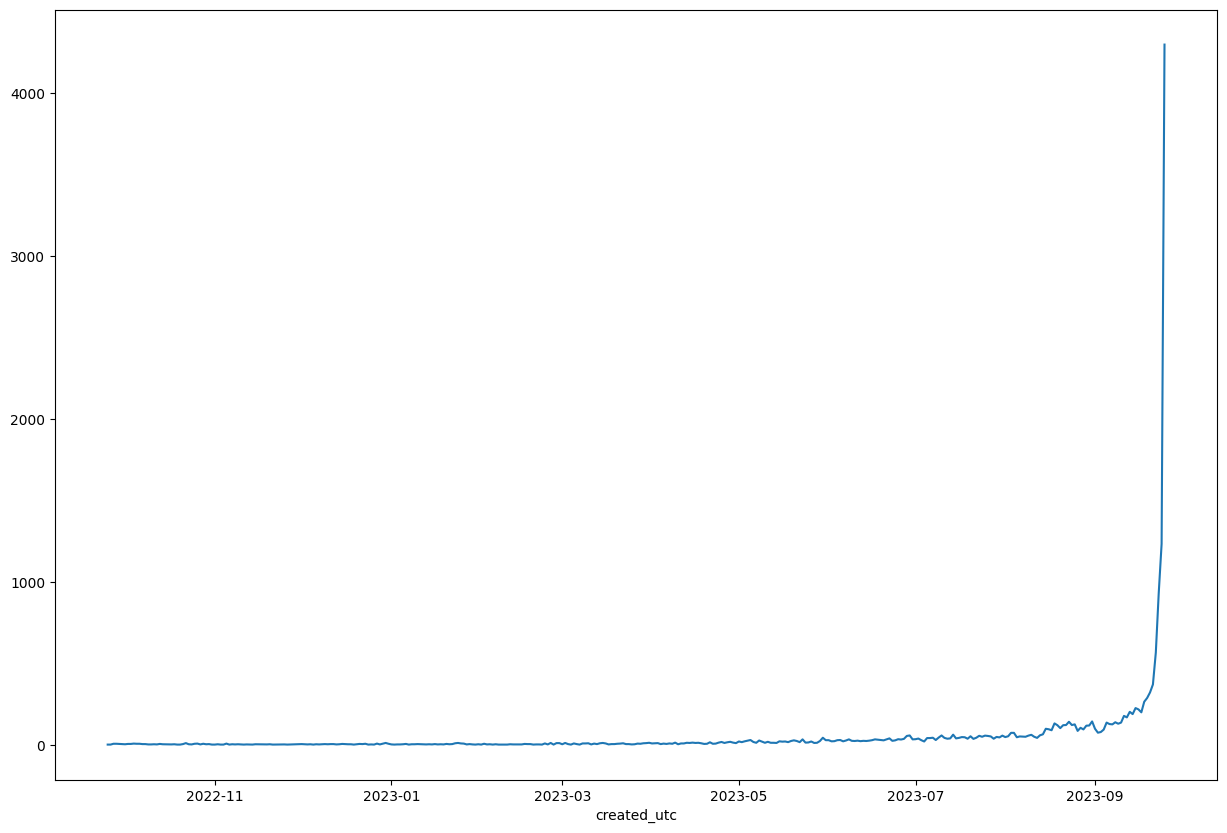

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df_copy = df.copy()
df_copy['created_utc'] = df_copy['created_utc'].apply(lambda x: pd.to_datetime(x, unit='s'))

daily_counts = df_copy['created_utc'].dt.date
print(daily_counts.head())
daily_counts = daily_counts.value_counts()
daily_counts = daily_counts[daily_counts > 1]
print(daily_counts)

fig, ax = plt.subplots(figsize=(15, 10))
daily_counts.plot(ax=ax)
plt.show()